In [1]:
#%%
import pandas as pd

df = pd.read_csv("bootstrap_res_train.csv")

df.describe()
# df.corr()

,0,1,2,3,4,5,6,length
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,-0.123229,3.710799,-0.526427,1.319876,-0.856735,-0.414695,-0.223403,160.230500
std,2.027310,1.937587,2.076514,1.846846,1.953244,2.205629,1.852182,159.600779
min,-6.937500,-2.859375,-7.343750,-4.625000,-7.593750,-7.406250,-6.375000,3.000000
25%,-1.406250,2.421875,-1.882812,0.124756,-2.144531,-1.828125,-1.462891,55.000000
50%,0.118652,3.875000,-0.348633,1.554688,-0.726562,-0.145508,0.026367,110.000000
75%,1.343750,5.187500,0.931641,2.671875,0.524414,1.250000,1.218750,212.000000
max,4.781250,8.687500,5.781250,6.156250,4.593750,4.156250,3.890625,1577.000000


In [2]:
df = pd.read_csv("bootstrap_res_test.csv")
df.describe()

,0,1,2,3,4,5,6,length
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,-1.353285,2.212058,-1.581872,0.319389,-1.903372,-1.604714,-1.189801,243.293000
std,1.725859,1.687732,1.666250,1.519566,1.565856,1.735656,1.470126,241.020123
min,-6.812500,-2.828125,-6.000000,-4.625000,-6.375000,-6.406250,-5.625000,3.000000
25%,-2.546875,1.046875,-2.765625,-0.700195,-3.046875,-2.859375,-2.187500,85.000000
50%,-1.359375,2.234375,-1.640625,0.357422,-1.992188,-1.632812,-1.214844,176.500000
75%,-0.197998,3.359375,-0.488281,1.359375,-0.874023,-0.291016,-0.159668,319.250000
max,4.156250,7.312500,4.406250,4.812500,3.781250,3.390625,2.984375,3607.000000


In [6]:
df_norm = df.drop("length", axis="columns")
df_norm = (df_norm - df_norm.mean()) / df_norm.std()
df_norm.describe()

,0,1,2,3,4,5,6
count,2.000000e+03,2.000000e+03,2.000000e+03,2000.000000,2.000000e+03,2.000000e+03,2.000000e+03
mean,5.506706e-17,-2.264855e-17,2.398082e-17,0.000000,-1.598721e-17,3.641532e-17,-3.108624e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.163186e+00,-2.986365e+00,-2.651540e+00,-3.253818,-2.855707e+00,-2.766410e+00,-3.016883e+00
25%,-6.915916e-01,-6.903842e-01,-7.104296e-01,-0.670971,-7.302731e-01,-7.228744e-01,-6.786488e-01
50%,-3.528638e-03,1.322284e-02,-3.526082e-02,0.025029,-5.672004e-02,-1.618926e-02,-1.703469e-02
75%,6.693981e-01,6.797979e-01,6.563183e-01,0.684397,6.573710e-01,7.568883e-01,7.007103e-01
max,3.192343e+00,3.022069e+00,3.593771e+00,2.956839,3.630360e+00,2.878069e+00,2.839331e+00


In [11]:
df_train = pd.read_csv("bootstrap_res_train.csv").drop("length", axis="columns")
# print(df.describe())
df = (df_train - df_train.mean()) / df_train.std()
std_train = df.std(axis=1).to_numpy()
print(df_train.mean(), df_train.std())
print(std_train)

df_test = pd.read_csv("bootstrap_res_test.csv").drop("length", axis="columns")
# print(df.describe())
df = (df_test - df_train.mean()) / df_train.std()
std_test = df.std(axis=1).to_numpy()
print(std_test)

0   -0.123229
1    3.710799
2   -0.526427
3    1.319876
4   -0.856735
5   -0.414695
6   -0.223403
dtype: float64 0    2.027310
1    1.937587
2    2.076514
3    1.846846
4    1.953244
5    2.205629
6    1.852182
dtype: float64
[0.27370496 0.13354988 0.17079652 ... 0.35264152 0.46572704 0.29053367]
[0.33521451 0.3604072  0.39379447 ... 0.25206129 0.43854271 0.44790607]


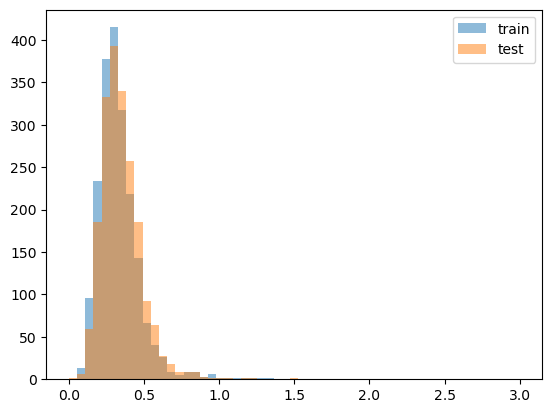

0.3317216072269548
0.3510884295632261


In [12]:
import matplotlib.pyplot as plt
import numpy as np
bins = np.linspace(0, 3, 56)

plt.hist(std_train, bins, alpha=0.5, label="train")
plt.hist(std_test, bins, alpha=0.5, label="test")
plt.legend(loc='upper right')
plt.show()
print(std_train.mean())
print(std_test.mean())

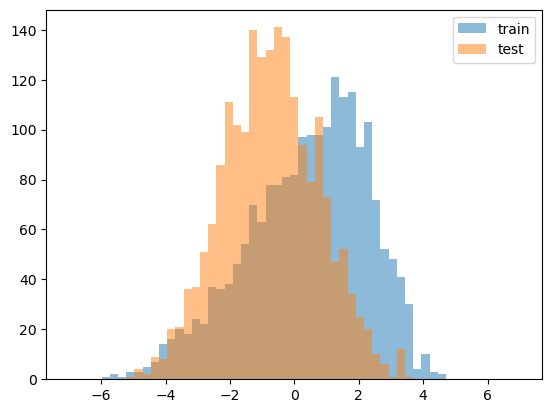

In [10]:
bins = np.linspace(-7, 7, 56) 
plt.hist(df_train.mean(axis=1), bins, alpha=0.5, label="train")
plt.hist(df_test.mean(axis=1), bins, alpha=0.5, label="test")
plt.legend(loc='upper right')
plt.show()

0       0.958984
1       2.806920
2       1.219448
3       2.477679
4       2.614955
          ...   
1995    1.334961
1996    1.534040
1997    0.014369
1998    1.246373
1999    2.340681
Length: 2000, dtype: float64